In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
human_data = pd.read_table('human.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [4]:
human_data['class'].unique()

array([4, 3, 5, 2, 6, 0, 1])

In [5]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [6]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)


In [7]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [8]:
human_texts = list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_data = human_data.iloc[:, 0].values  

In [9]:
print(human_texts[2])

atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accggt

In [10]:
y_data

array([4, 4, 3, ..., 6, 6, 6])

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)


In [12]:
print(X.shape)

(4380, 232414)


<Axes: >

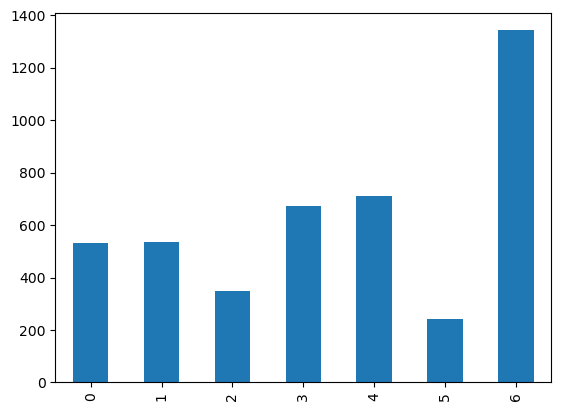

In [13]:
human_data['class'].value_counts().sort_index().plot.bar()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [16]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0    1   2    3    4   5    6
Actual                                    
0          100    0   0    0    1   0    1
1            0  104   0    0    0   0    2
2            0    0  78    0    0   0    0
3            0    0   0  124    1   0    0
4            1    0   0    0  145   0    3
5            0    0   0    0    0  51    0
6            1    0   0    1    0   0  263
accuracy = 0.987 
precision = 0.988 
recall = 0.987 
f1 = 0.987


In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', C=1.0)  
classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [22]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', alpha=0.000001, max_iter=1000, random_state=42)
classifier.fit(X_train, y_train)


MLPClassifier(alpha=1e-06, hidden_layer_sizes=(64, 32), max_iter=1000,
              random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Create a list of classifiers
classifiers = [
    ("Multinomial Naive Bayes", MultinomialNB(alpha=0.2)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("SVM", SVC(kernel='linear', C=1.0)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Neural Network", MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', alpha=0.0001, max_iter=1000, random_state=42))
]

results = []

for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append((name, accuracy, precision, recall, f1))

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

# Display the results
print(results_df)


                     Model  Accuracy  Precision    Recall  F1-Score
0  Multinomial Naive Bayes  0.987443   0.987514  0.987443  0.987443
1            Random Forest  0.921233   0.927976  0.921233  0.922092
2                      SVM  0.913242   0.925850  0.913242  0.914181
3            Decision Tree  0.819635   0.835717  0.819635  0.823962
4           Neural Network  0.974886   0.975625  0.974886  0.974839


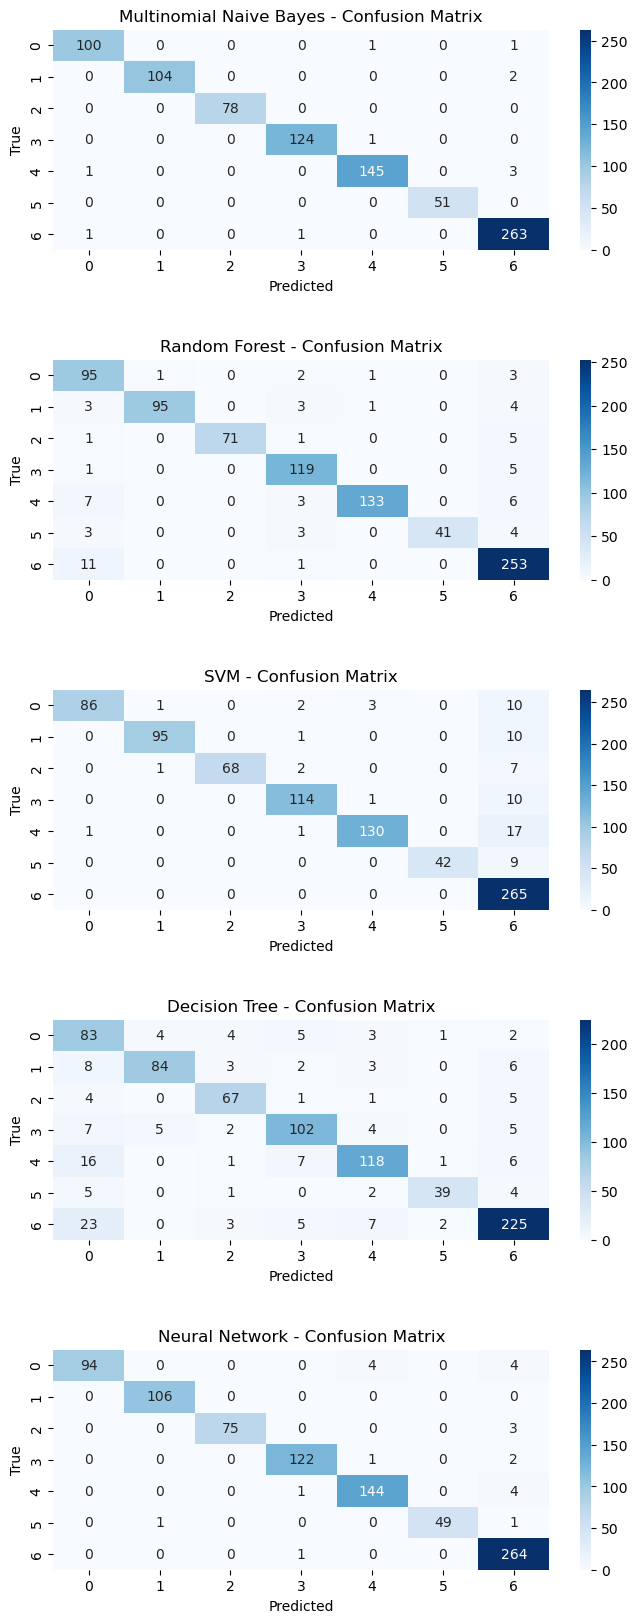

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Set up a figure to contain subplots
fig, axes = plt.subplots(nrows=len(classifiers), ncols=1, figsize=(8, 4 * len(classifiers)), sharex=False)
fig.subplots_adjust(hspace=0.5)

for i, (name, classifier) in enumerate(classifiers):
    # Plot Confusion Matrix
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name} - Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

# Display the plots
plt.show()


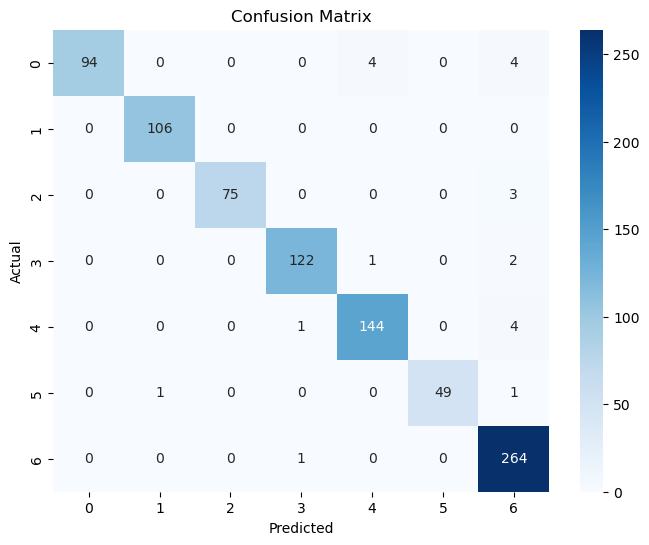

Accuracy: 0.975
Precision: 0.976
Recall: 0.975
F1 Score: 0.975


In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_test and y_pred are already defined
# If not, you may need to calculate them first

# Confusion Matrix
conf_matrix = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted'))

# Visualization using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=conf_matrix.columns, yticklabels=conf_matrix.index)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Metrics
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

# Display Metrics
print("Accuracy: %.3f" % accuracy)
print("Precision: %.3f" % precision)
print("Recall: %.3f" % recall)
print("F1 Score: %.3f" % f1)


Accuracy: 0.9394977168949772

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       102
           1       1.00      0.93      0.97       106
           2       1.00      0.94      0.97        78
           3       0.97      0.93      0.95       125
           4       1.00      0.90      0.95       149
           5       1.00      0.86      0.93        51
           6       0.84      1.00      0.92       265

    accuracy                           0.94       876
   macro avg       0.97      0.92      0.95       876
weighted avg       0.95      0.94      0.94       876


Confusion Matrix:
 [[ 92   0   0   1   0   0   9]
 [  0  99   0   2   0   0   5]
 [  0   0  73   0   0   0   5]
 [  0   0   0 116   0   0   9]
 [  1   0   0   0 134   0  14]
 [  0   0   0   0   0  44   7]
 [  0   0   0   0   0   0 265]]


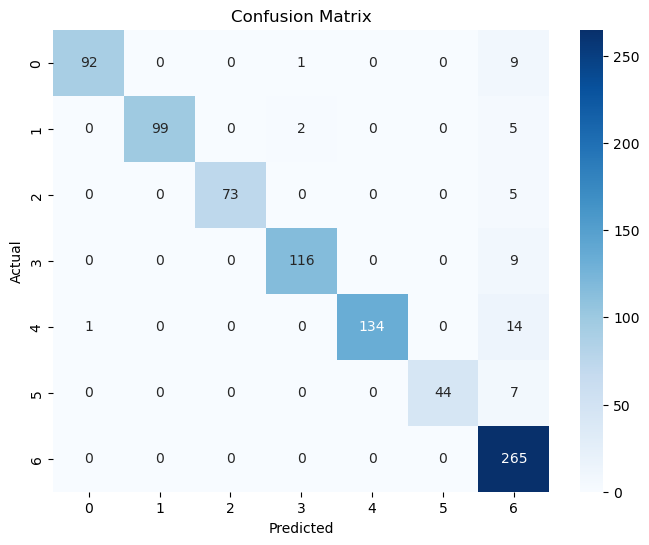

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are already defined
# If not, you need to define them using train_test_split as you provided

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


KNN Accuracy: 0.7614155251141552

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50       102
           1       1.00      0.72      0.84       106
           2       1.00      0.78      0.88        78
           3       1.00      0.85      0.92       125
           4       1.00      0.65      0.79       149
           5       1.00      0.67      0.80        51
           6       0.98      0.72      0.83       265

    accuracy                           0.76       876
   macro avg       0.90      0.77      0.79       876
weighted avg       0.92      0.76      0.80       876


KNN Confusion Matrix:
 [[102   0   0   0   0   0   0]
 [ 30  76   0   0   0   0   0]
 [ 15   0  61   0   0   0   2]
 [ 19   0   0 106   0   0   0]
 [ 52   0   0   0  97   0   0]
 [ 16   0   0   0   0  34   1]
 [ 74   0   0   0   0   0 191]]


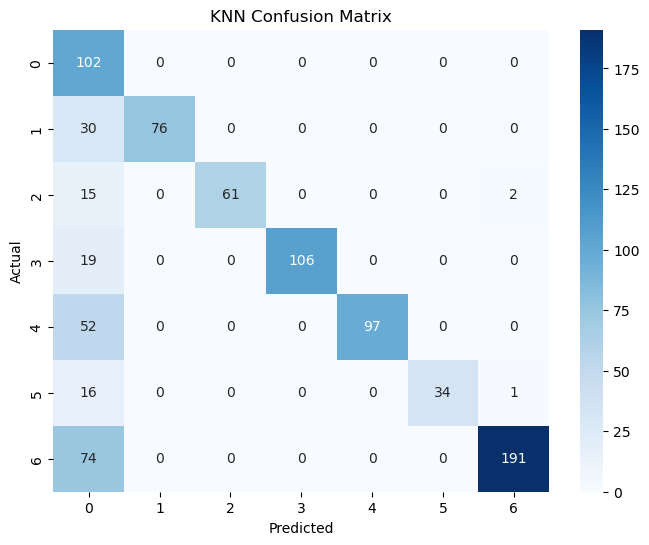

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are already defined
# If not, you need to define them using train_test_split as you provided

# Create and train the KNN model (let's say with k=3 for illustration)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# Display classification report and confusion matrix for KNN
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Visualize the confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


XGBoost Accuracy: 0.8984018264840182

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.79      0.87       102
           1       1.00      0.85      0.92       106
           2       1.00      0.85      0.92        78
           3       0.93      0.90      0.91       125
           4       0.96      0.89      0.92       149
           5       1.00      0.88      0.94        51
           6       0.79      0.98      0.87       265

    accuracy                           0.90       876
   macro avg       0.95      0.88      0.91       876
weighted avg       0.91      0.90      0.90       876


XGBoost Confusion Matrix:
 [[ 81   0   0   0   3   0  18]
 [  0  90   0   3   0   0  13]
 [  0   0  66   1   1   0  10]
 [  0   0   0 113   0   0  12]
 [  2   0   0   4 132   0  11]
 [  0   0   0   0   0  45   6]
 [  2   0   0   1   2   0 260]]


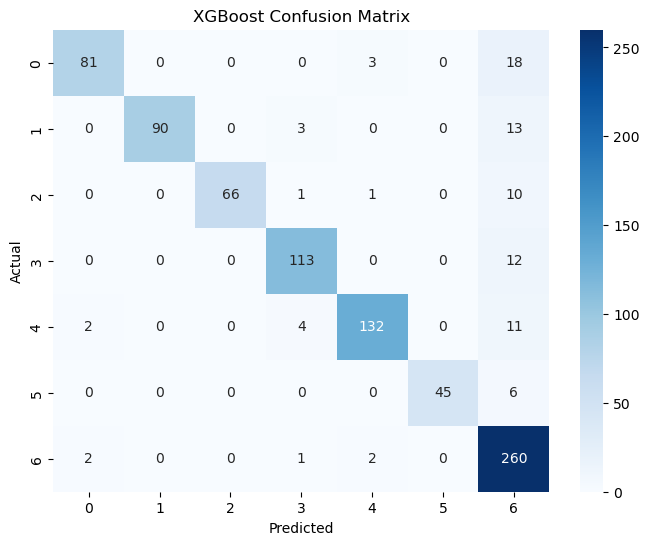

In [58]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are already defined
# If not, you need to define them using train_test_split as you provided

# Create and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Display classification report and confusion matrix for XGBoost
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Visualize the confusion matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues', xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [57]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/3e/62/eb702237833c2f49bb7f3a4e6f49807ec213c2539ff8d9bddb2e13aa3690/xgboost-2.0.2-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


                     Model  Accuracy  Precision    Recall  F1-Score
0  Multinomial Naive Bayes  0.987443   0.987514  0.987443  0.987443
1            Random Forest  0.921233   0.927976  0.921233  0.922092
2                      SVM  0.913242   0.925850  0.913242  0.914181
3            Decision Tree  0.804795   0.823397  0.804795  0.809686
4           Neural Network  0.974886   0.975625  0.974886  0.974839
5                      KNN  0.761416   0.917444  0.761416  0.800578
6      Logistic Regression  0.939498   0.947943  0.939498  0.940427
7                  XGBoost  0.898402   0.912430  0.898402  0.899602


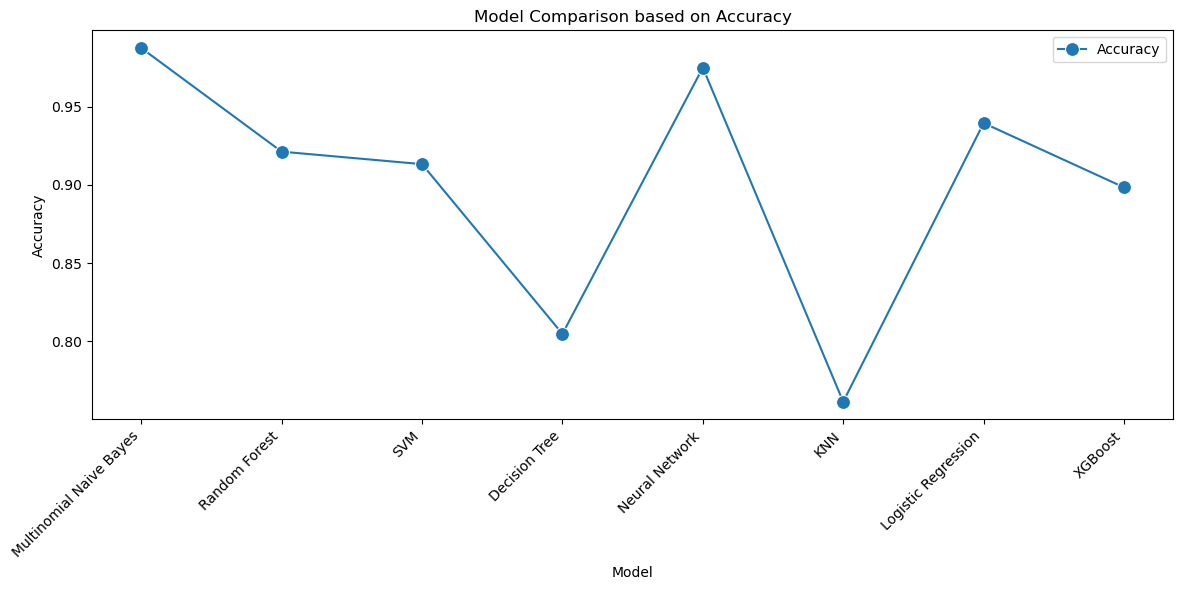

In [36]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Assuming you have the data and necessary preprocessing done
# ...

# Create a list of classifiers
classifiers = [
    ("Multinomial Naive Bayes", MultinomialNB(alpha=0.2)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("SVM", SVC(kernel='linear', C=1.0)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Neural Network", MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', alpha=0.0001, max_iter=1000, random_state=42)),
    ("KNN", KNeighborsClassifier(n_neighbors=3)),
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42))
]

results = []

for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append((name, accuracy, precision, recall, f1))

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

# Display the results
print(results_df)

# Create a line graph for accuracy
plt.figure(figsize=(12, 6))
sns.lineplot(x="Model", y="Accuracy", data=results_df, marker='o', markersize=10, label='Accuracy')
plt.title('Model Comparison based on Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd

# Data
data = {
    'Model': ['Multinomial Naive Bayes', 'Random Forest', 'SVM', 'Decision Tree', 'Neural Network', 'KNN', 'Logistic Regression', 'XGBoost'],
    'Accuracy': [0.987443, 0.921233, 0.913242, 0.804795, 0.974886, 0.761416, 0.939498, 0.898402],
    'Precision': [0.987514, 0.927976, 0.925850, 0.823397, 0.975625, 0.917444, 0.947943, 0.912430],
    'Recall': [0.987443, 0.921233, 0.913242, 0.804795, 0.974886, 0.761416, 0.939498, 0.898402],
    'F1-Score': [0.987443, 0.922092, 0.914181, 0.809686, 0.974839, 0.800578, 0.940427, 0.899602]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


                     Model  Accuracy  Precision    Recall  F1-Score
0  Multinomial Naive Bayes  0.987443   0.987514  0.987443  0.987443
1            Random Forest  0.921233   0.927976  0.921233  0.922092
2                      SVM  0.913242   0.925850  0.913242  0.914181
3            Decision Tree  0.804795   0.823397  0.804795  0.809686
4           Neural Network  0.974886   0.975625  0.974886  0.974839
5                      KNN  0.761416   0.917444  0.761416  0.800578
6      Logistic Regression  0.939498   0.947943  0.939498  0.940427
7                  XGBoost  0.898402   0.912430  0.898402  0.899602
